# Module 6: Root fining and optimization


Finding an extremum (minimum or maximum) of a function $f(x)$ of a single variable, we need to solve the equation $f’(x)=0$, assuming $f(x)$ is differentiable. Hence, we start with the problem of root fining.


## Root finding in 1D: [Bisection method](https://en.wikipedia.org/wiki/Bisection_method)

Given the interval $[a, b]$ such that $f(a)f(b) < 0$, i.e., $f(a)$ has the opposite sign of $f(b)$, find $x \in [a, b]$, such that $f(x) = 0$.

In [1]:
function bisection(f::Function, a::Real, b::Real, max_nsteps::Int = 1000, abstol::Real = 1e-15)
    
    @assert f(a) * f(b) < 0
    
    mid = a + (b - a) / 2
    
    for step = 1:max_nsteps
        
        @show mid
        
        if abs(f(mid)) < abstol
            return mid
        end
        
        if f(a) * f(mid) < 0
           b = mid 
        else 
            # f(mid) * f(b) < 0
            a = mid
        end
        
        mid = a + (b - a) / 2
    end
    
    println("Maximum number of iterations is reached")
    
    return mid
end

bisection (generic function with 3 methods)

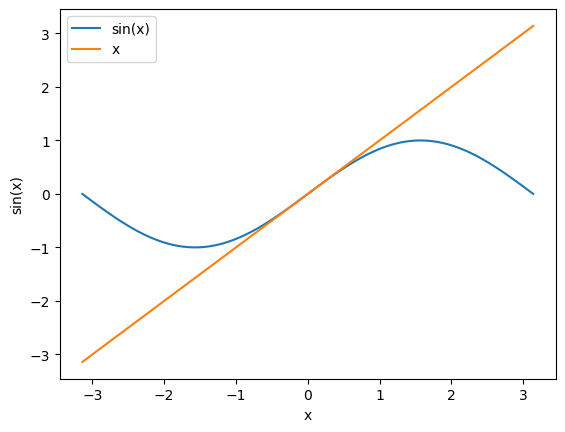

In [20]:
using PyPlot

x = range(-π, π, 100)

plot(x, sin.(x), label="sin(x)")
plot(x, x, label="x")

legend()
xlabel("x")
ylabel("sin(x)")
show()

In [3]:
bisection(sin, -1.5, 3)

mid = 0.75
mid = -0.375
mid = 0.1875
mid = -0.09375
mid = 0.046875
mid = -0.0234375
mid = 0.01171875
mid = -0.005859375
mid = 0.0029296875
mid = -0.00146484375
mid = 0.000732421875
mid = -0.0003662109375
mid = 0.00018310546875
mid = -9.1552734375e-5
mid = 4.57763671875e-5
mid = -2.288818359375e-5
mid = 1.1444091796875e-5
mid = -5.7220458984375e-6
mid = 2.86102294921875e-6
mid = -1.430511474609375e-6
mid = 7.152557373046875e-7
mid = -3.5762786865234375e-7
mid = 1.7881393432617188e-7
mid = -8.940696716308594e-8
mid = 4.470348358154297e-8
mid = -2.2351741790771484e-8
mid = 1.1175870895385742e-8
mid = -5.587935447692871e-9
mid = 2.7939677238464355e-9
mid = -1.3969838619232178e-9
mid = 6.984919309616089e-10
mid = -3.4924596548080444e-10
mid = 1.7462298274040222e-10
mid = -8.731149137020111e-11
mid = 4.3655745685100555e-11
mid = -2.1827872842550278e-11
mid = 1.0913936421275139e-11
mid = -5.4569682106375694e-12
mid = 2.7284841053187847e-12
mid = -1.3642420526593924e-12
mid = 6.821210263296962

6.661338147750939e-16

## [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) in 1D

[This is an iterative method](http://dlmf.nist.gov/3.8.ii) for real twice-continuously differentiable, or complex analytic, function:

$$
    x_{n + 1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$

Note that there are [cases](https://en.wikipedia.org/wiki/Newton%27s_method) when the method does not converge. 

![!](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Newton_iteration.svg/554px-Newton_iteration.svg.png)

In [4]:
function newton(f::Function, diff_f::Function, x₀, max_nsteps::Int = 1000, abstol::Real = 1e-15)
     xₙ = x₀
    
    for step = 1:max_nsteps
        
        if abs(f(xₙ)) < abstol
           return xₙ 
        end
        
        # xₙ = xₙ - f(xₙ) / diff_f(xₙ)
        xₙ -= f(xₙ) / diff_f(xₙ)
        
        @show xₙ
    end
    
    println("Maximum number of iterations is reached")
    
    return xₙ 
end

newton (generic function with 3 methods)

In [5]:
newton(sin, cos, -1.5)

xₙ = 12.60141994717172
xₙ = 12.566356255118672
xₙ = 12.566370614359174
xₙ = 12.566370614359172


12.566370614359172

In [6]:
12.566370614359172 / (π)

4.0

## Fixed-Point Iterations

The fixed point is a solution to the equation

$$x = f(x).$$

The fixed point is easy to find via the following simple iterative procedure: $x_{n+1} = f(x_n)$. [Under certain conitions](https://en.wikipedia.org/wiki/Fixed-point_theorem), $x_n$ is guaranteed to converge to the fixed point as $n\to\infty$.

In [11]:
function fixed_point(f::Function, x₀, max_nsteps::Int = 1000, abstol::Real = 1e-15)
    xₙ = xₙ₊₁ = x₀
    
    for step = 1:max_nsteps
        
        xₙ₊₁ = f(xₙ)
        
        if abs(xₙ - xₙ₊₁) < abstol
            return xₙ
        end
        
        xₙ = xₙ₊₁ 
        
        @show xₙ
    end
    
    println("Maximum number of iterations is reached")
    
    return xₙ 
end

fixed_point (generic function with 3 methods)

In [14]:
fixed_point(sin, 0.25)

xₙ = 0.24740395925452294
xₙ = 0.24488779227422167
xₙ = 0.24244746635891098
xₙ = 0.2400792291404323
xₙ = 0.23777958395381066
xₙ = 0.23554526780759885
xₙ = 0.23337323163481075
xₙ = 0.23126062255013285
xₙ = 0.22920476787653393
xₙ = 0.22720316073613017
xₙ = 0.22525344702716119
xₙ = 0.22335341363196864
xₙ = 0.2215009777205821
xₙ = 0.21969417703143557
xₙ = 0.21793116102529686
xₙ = 0.21621018282105392
xₙ = 0.21452959183286896
xₙ = 0.21288782703763362
xₙ = 0.21128341080984983
xₙ = 0.20971494326819645
xₙ = 0.20818109708427268
xₙ = 0.20668061270946184
xₙ = 0.2052122939806396
xₙ = 0.2037750040696522
xₙ = 0.20236766174518792
xₙ = 0.2009892379189273
xₙ = 0.1996387524507407
xₙ = 0.1983152711902526
xₙ = 0.1970179032343564
xₙ = 0.19574579838227227
xₙ = 0.19449814477153077
xₙ = 0.19327416667985736
xₙ = 0.19207312247935696
xₙ = 0.19089430273066899
xₙ = 0.189737028405902
xₙ = 0.1886006492301776
xₙ = 0.18748454213253044
xₙ = 0.18638810979773407
xₙ = 0.18531077931136491
xₙ = 0.18425200089108462
xₙ = 0.1832

xₙ = 0.08330219659447732
xₙ = 0.08320588747223559
xₙ = 0.08310991192789284
xₙ = 0.08301426803918087
xₙ = 0.08291895389930999
xₙ = 0.08282396761680913
xₙ = 0.08272930731536789
xₙ = 0.08263497113368062
xₙ = 0.08254095722529249
xₙ = 0.08244726375844738
xₙ = 0.08235388891593778
xₙ = 0.08226083089495653
xₙ = 0.08216808790695034
xₙ = 0.0820756581774752
xₙ = 0.08198353994605355
xₙ = 0.08189173146603325
xₙ = 0.0818002310044482
xₙ = 0.0817090368418808
xₙ = 0.08161814727232593
xₙ = 0.08152756060305678
xₙ = 0.0814372751544922
xₙ = 0.08134728926006567
xₙ = 0.08125760126609591
xₙ = 0.08116820953165906
xₙ = 0.08107911242846233
xₙ = 0.08099030834071928
xₙ = 0.08090179566502652
xₙ = 0.08081357281024194
xₙ = 0.0807256381973644
xₙ = 0.08063799025941483
xₙ = 0.08055062744131873
xₙ = 0.0804635481997902
xₙ = 0.08037675100321715
xₙ = 0.08029023433154807
xₙ = 0.08020399667617999
xₙ = 0.08011803653984785
xₙ = 0.08003235243651514
xₙ = 0.07994694289126585
xₙ = 0.07986180644019761
xₙ = 0.07977694163031625
xₙ = 0

0.05345592283357173

In [15]:
fixed_point(cos, 0.25)

xₙ = 0.9689124217106447
xₙ = 0.5661963244509127
xₙ = 0.8439474651598078
xₙ = 0.6645181803460104
xₙ = 0.787214004993313
xₙ = 0.7058216222217143
xₙ = 0.761078855759294
xₙ = 0.7240923421872705
xₙ = 0.7491010136260781
xₙ = 0.7323013570816245
xₙ = 0.7436377252305164
xₙ = 0.7360108039022628
xₙ = 0.7411525424307221
xₙ = 0.7376909229991697
xₙ = 0.7400235713587021
xₙ = 0.738452664642206
xₙ = 0.7395110238024618
xₙ = 0.7387981811724498
xₙ = 0.7392783971315969
xₙ = 0.7389549345142898
xₙ = 0.7391728303616282
xₙ = 0.7390260565203767
xₙ = 0.7391249266976642
xₙ = 0.7390583272614917
xₙ = 0.7391031897624654
xₙ = 0.7390729699872061
xₙ = 0.7390933264571526
xₙ = 0.7390796141239898
xₙ = 0.739088850930107
xₙ = 0.7390826289125442
xₙ = 0.7390868201412102
xₙ = 0.7390839968804297
xₙ = 0.7390858986634274
xₙ = 0.7390846175997838
xₙ = 0.7390854805397826
xₙ = 0.7390848992530726
xₙ = 0.7390852908148172
xₙ = 0.7390850270541269
xₙ = 0.7390852047265059
xₙ = 0.7390850850442564
xₙ = 0.7390851656636603
xₙ = 0.7390851113574

0.7390851332151611

In [19]:
fixed_point(x -> exp(-x), 0.25)

xₙ = 0.7788007830714049
xₙ = 0.4589560693076638
xₙ = 0.6319430059834795
xₙ = 0.5315579766395019
xₙ = 0.5876886508726961
xₙ = 0.5556100104627527
xₙ = 0.5737221778988232
xₙ = 0.5634243651210017
xₙ = 0.5692563807119256
xₙ = 0.5659461307216159
xₙ = 0.5678226580691264
xₙ = 0.5667581224502082
xₙ = 0.567361777908229
xₙ = 0.5670193902268157
xₙ = 0.5672135639205953
xₙ = 0.5671034366599815
xₙ = 0.5671658936469909
xₙ = 0.5671304712803379
xₙ = 0.5671505607396377
xₙ = 0.5671391671059771
xₙ = 0.5671456289186934
xₙ = 0.567141964141697
xₙ = 0.5671440425943294
xₙ = 0.5671428638135262
xₙ = 0.5671435323510408
xₙ = 0.56714315319444
xₙ = 0.5671433682305509
xₙ = 0.5671432462742597
xₙ = 0.5671433154409509
xₙ = 0.5671432762135257
xₙ = 0.5671432984610966
xₙ = 0.5671432858435359
xₙ = 0.5671432929995007
xₙ = 0.5671432889410434
xₙ = 0.5671432912427702
xₙ = 0.5671432899373613
xₙ = 0.5671432906777152
xₙ = 0.5671432902578284
xₙ = 0.5671432904959645
xₙ = 0.5671432903609072
xₙ = 0.567143290437504
xₙ = 0.56714329039406

0.5671432904097833

## [Acceleration of Convergence](http://dlmf.nist.gov/3.9)


[Aitken's process](http://dlmf.nist.gov/3.9.iii): Let $s_n = a + c q^n$, where $c$ and $|q| < 1$ is unknown. If $q$ is very close to 1, then the sequence $s_n$ very solwly converges to $a$. In other words we have to evaluate $s_n$ for a very large $n$ to get a good approximation to $a$.

In this case, Aitken's process comes to the rescue!  We just need to know 3 consecutive values $s_{n}, s_{n+1}, s_{n+2}$ to get $a$

$$
    s_n - \frac{(s_{n+1} - s_n)^2}{s_{n+2} - 2 s_{n+1} + s_n} = a.
$$

In [48]:
function Aitken(sₙ, sₙ₊₁, sₙ₊₂)
    
    denominator = sₙ₊₂ - 2 * sₙ₊₁ + sₙ
    
    if abs(denominator) ≈ 0
        return sₙ₊₂
    else
        return sₙ - (sₙ₊₁ - sₙ) ^ 2 / denominator
    end
end

Aitken (generic function with 1 method)

In [50]:
function fixed_point_Aitken(f::Function, x₀, max_nsteps::Int = 1000, abstol::Real = 1e-15)
    xₙ = xₙ₊₁ = x₀
    
    for step = 1:max_nsteps
        
        sₙ = f(xₙ)
        sₙ₊₁ = f(sₙ) # f(f(xₙ))
        sₙ₊₂ = f(sₙ₊₁) # f(f(f(xₙ)))
        
        xₙ₊₁ = Aitken(sₙ, sₙ₊₁, sₙ₊₂)
        
        if abs(xₙ - xₙ₊₁) < abstol
            return xₙ
        end
        
        xₙ = xₙ₊₁ 
        
        @show xₙ
    end
    
    println("Maximum number of iterations is reached")
    
    return xₙ 
end

fixed_point_Aitken (generic function with 3 methods)

In [51]:
fixed_point_Aitken(cos, 0.25)

xₙ = 0.7305758113012142
xₙ = 0.739080281588056
xₙ = 0.739085133213572
xₙ = 0.7390851332151607


0.7390851332151607

In [52]:
fixed_point_Aitken(sin, 0.25)

xₙ = 0.1639254865624003
xₙ = 0.10850502105895535
xₙ = 0.07211014406202754
xₙ = 0.048006842964687824
xₙ = 0.03198490241765692
xₙ = 0.02131745236920896
xₙ = 0.014209912845622813
xₙ = 0.009472765063690823
xₙ = 0.006315025877110901
xₙ = 0.004209970866187592
xₙ = 0.002806634659521387
xₙ = 0.0018710940692318633
xₙ = 0.0012474209799365618
xₙ = 0.0008316991125405099
xₙ = 0.0005545821898038256
xₙ = 0.0003682350793442149
xₙ = 0.00024048295398966025
xₙ = 0.00017440878004181622
xₙ = 0.00017440877738919628
xₙ = 0.00014556466071585685
xₙ = 0.00014556465917366695
xₙ = 0.00014556465763147707
xₙ = 0.00014556465608928727
xₙ = 0.00013581514398615157
xₙ = 0.00013581514273354524
xₙ = 0.00013581514148093898
xₙ = 0.00013581514022833273
xₙ = 0.00013581513897572653
xₙ = 0.00013581513772312036
xₙ = 0.00012938328143277103
xₙ = 0.0001293832803498308
xₙ = 0.0001293832792668906
xₙ = 0.00012938327818395043
xₙ = 0.0001293832771010103
xₙ = 0.00012938327601807017
xₙ = 0.0001293832749351301
xₙ = 0.00012938327385219003
x

xₙ = 9.217851783589914e-5
xₙ = 9.217851744428429e-5
xₙ = 9.217851705266945e-5
xₙ = 9.217851666105461e-5
xₙ = 9.217851626943977e-5
xₙ = 9.217851587782493e-5
xₙ = 9.217851548621008e-5
xₙ = 9.217851509459524e-5
xₙ = 9.21785147029804e-5
xₙ = 9.092116659236078e-5
xₙ = 9.092116621655364e-5
xₙ = 8.976327625483452e-5
xₙ = 8.976327589320314e-5
xₙ = 8.869109153169353e-5
xₙ = 8.86910911828666e-5
xₙ = 8.869109083403968e-5
xₙ = 8.869109048521276e-5
xₙ = 8.869109013638583e-5
xₙ = 8.869108978755891e-5
xₙ = 8.869108943873198e-5
xₙ = 8.86910890899051e-5
xₙ = 8.869108874107822e-5
xₙ = 8.869108839225133e-5
xₙ = 8.869108804342445e-5
xₙ = 8.869108769459756e-5
xₙ = 8.869108734577068e-5
xₙ = 8.86910869969438e-5
xₙ = 8.869108664811691e-5
xₙ = 8.869108629929003e-5
xₙ = 8.869108595046315e-5
xₙ = 8.86910856016363e-5
xₙ = 8.869108525280946e-5
xₙ = 8.869108490398262e-5
xₙ = 8.869108455515577e-5
xₙ = 8.869108420632893e-5
xₙ = 8.869108385750209e-5
xₙ = 8.869108350867524e-5
xₙ = 8.86910831598484e-5
xₙ = 8.86910828110

xₙ = 7.78247940283375e-5
xₙ = 7.782479379265684e-5
xₙ = 7.782479355697619e-5
xₙ = 7.782479332129553e-5
xₙ = 7.782479308561487e-5
xₙ = 7.782479284993422e-5
xₙ = 7.782479261425356e-5
xₙ = 7.78247923785729e-5
xₙ = 7.782479214289225e-5
xₙ = 7.782479190721159e-5
xₙ = 7.782479167153094e-5
xₙ = 7.782479143585028e-5
xₙ = 7.782479120016966e-5
xₙ = 7.782479096448905e-5
xₙ = 7.782479072880843e-5
xₙ = 7.782479049312782e-5
xₙ = 7.78247902574472e-5
xₙ = 7.782479002176659e-5
xₙ = 7.782478978608597e-5
xₙ = 7.782478955040535e-5
xₙ = 7.782478931472474e-5
xₙ = 7.782478907904412e-5
xₙ = 7.782478884336351e-5
xₙ = 7.782478860768289e-5
xₙ = 7.782478837200228e-5
xₙ = 7.782478813632166e-5
xₙ = 7.782478790064104e-5
xₙ = 7.782478766496043e-5
xₙ = 7.782478742927981e-5
xₙ = 7.78247871935992e-5
xₙ = 7.782478695791858e-5
xₙ = 7.7824786722238e-5
xₙ = 7.782478648655743e-5
xₙ = 7.782478625087686e-5
xₙ = 7.782478601519628e-5
xₙ = 7.78247857795157e-5
xₙ = 7.782478554383513e-5
xₙ = 7.782478530815456e-5
xₙ = 7.782478507247

7.782478247998766e-5

## [The Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set)

is a set of points $\{c\}$ for which the function $f(z) = z^2 + c$ has a finite fixed point when the iteration starts from $z_0 = 0$. $|z_n|$ remains finite as $n \to \infty$ where $z_{n+1} = f(z_{n})$.

  2.679725 seconds (211.04 M allocations: 6.217 GiB, 5.42% gc time, 1.52% compilation time: 25% of which was recompilation)


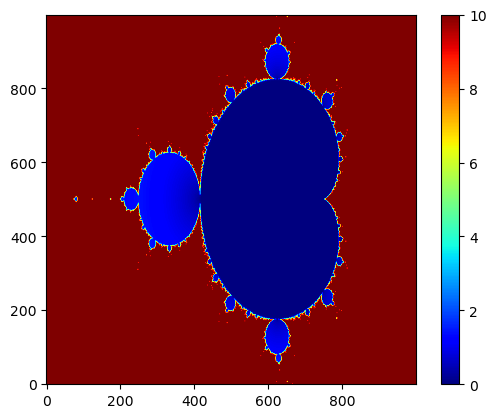

In [56]:
x = range(-2, 1, 1000)
y = range(-1, 1, 1000)

image = zeros(length(y), length(x))

@time begin

Threads.@threads for k = 1:length(x)
    for j = 1:length(y)
    
        c = x[k] + im * y[j]
        
        f(z) = z ^ 2 + c
        
        # Iterating
        zₙ = 0im
        for step = 1:200
            zₙ = f(zₙ) 
        end
        
        # Coloring
        val = abs(f(zₙ) - zₙ)
        if val < 10
            image[j, k] = val
        else
            image[j, k] = 10
        end
    end
end

end

using PyPlot

imshow(image, origin="lower", cmap="jet")
colorbar()
show()

## Introduction to Optimization

The problem of **maximization** (i.e., finding a maximum of a real-valued function), 

$$
    \mbox{maximize }_{\vec{x}} \, f(\vec{x})
$$

is equivalent to the **minimization** problem

$$
	\mbox{minimize }_{\vec{x}} \, -f(\vec{x}).
$$

Hence we only study the latter problem.

The **constrained minimization**

$$
	\mbox{minimize }_{\vec{x}} \, f(\vec{x})
$$
$$
	\mbox{subject to } \, g(\vec{x}) = 0,
$$

finding the minimum of the function $f(\vec{x})$ under the equality constrain $g(\vec{x}) = 0$, can be reduced to the unconstrained minimization via [the method of Lagrange multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier)

$$
    \mbox{minimize }_{\vec{x}, \lambda} \, f(\vec{x}) + \lambda g(\vec{x}).
$$


The general problem of constrained minimization

$$
	\mbox{minimize }_{\vec{x}} \, f(\vec{x})
$$
$$
	\mbox{subject to } g(\vec{x}) = 0
$$
$$
    \qquad\qquad h(\vec{x}) \leq 0.
$$

can be transformed into the unconstrained minimization by the following steps

$$
	\mbox{minimize }_{\vec{x}, y} \, f(\vec{x})
$$
$$
	\mbox{subject to } g(\vec{x}) = 0
$$
$$
    \qquad\qquad\qquad h(\vec{x}) + y^2 =  0,
$$

and via the method of Lagrange multipliers we get

$$
	\mbox{minimize }_{\vec{x}, y, \lambda_1, \lambda_2} \, f(\vec{x}) + \lambda_1 g(\vec{x}) + \lambda_2 \left(h(\vec{x}) + y^2\right).
$$

## Gradient decent

$$
    x_{n+1} = x_n - \gamma f'(x_n)
$$

$$
        \vec{x}_{n+1} = \vec{x}_n - \gamma \nabla f(\vec{x}_n)
$$
